# THE MINI FINITE STATE MACHINE: THE COMPLETE FSM BASED ON THE GRAPH FSMver0 #

**The purpose of this code is to create the complete FSM for the Hanoi Droid Capstone.**

_**Main mission: only to test the modules developed**_

**Acknowledge: all the library makers:**

**https://github.com/pytransitions/transitions**





In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from transitions import Machine
import serial
import speech_recognition as sr
import time

In [2]:
#my custom modules imports
import settingsHD as glb #this import all the global variables
import hanoi_img_procHD as vidpro
import matrix_proc as mtrx
#import statemachine as FSMrobot
import voicerecog as vr

In [3]:
#some global variables
sort_disc_dictionary = {'sort0' : None, 'sort1': None, 'sort2': None}


#variables used for drawing

#states images with theoric matrix
mtx_state_dict = {} #dictionary used to store the images
img_quant = 8  #number of picture states


for i in range (0, (img_quant)):

    name_file = 'DATA/states_img/state' + str(i) + '.jpg'
    name_var = str('state'+str(i))
    mtx_state_dict[name_var] = cv2.imread(name_file)




In [4]:
# this state machine corresponds to all the behaviour of the Hanoi Droid robot, focused on solve the tower of hanoi game.

#from transitions import Machine

class HanoiDroidFSM(object):

    # Define some states. Most of the time, narcoleptic superheroes are just like
    # everyone else. Except for...
    states = ['zero', 'face_track', 'voice_cmd', 'hanoi_game', 'hg_step1', 'hg_step2', 'hg_step3', 'hg_step4', 'hg_step5', 'hg_step6', 'hg_step7', \
              'custom_disc', 'organize_mov','comp_matrix' , 'game_solv', 'prompt_error'  ]
    # A more compact version of the quickstart transitions
    transitions = [{'trigger': 'timer_start_track', 'source': 'zero', 'dest':  'face_track'},
                   {'trigger': 'timer_face_out', 'source': 'face_track', 'dest':  'zero'},
                   {'trigger': 'voice', 'source': 'zero', 'dest':  'voice_cmd', 'before': 'recognize_command'},
                   {'trigger': 'voice', 'source': 'face_track', 'dest':  'voice_cmd'},
                   {'trigger': 'non_voice', 'source': 'voice_cmd', 'dest':  'zero'},
                   {'trigger': 'custom_disc', 'source': 'voice_cmd', 'dest':  'custom_disc'},
                   {'trigger': 'get_mtx', 'source': 'custom_disc', 'dest':  'organize_mov'},
                   {'trigger': 'ack', 'source': 'organize_mov', 'dest':  'comp_matrix'},
                   {'trigger': 'eq_mtx', 'source': 'comp_matrix', 'dest':  'game_solved'},
                   {'trigger': 'dif_mtx', 'source': 'comp_matrix', 'dest':  'prompt_error'},
                   {'trigger': 'solve_hanoi', 'source': 'voice_cmd', 'dest':  'hanoi_game'},
                   {'trigger': 'hg_start', 'source': 'hanoi_game', 'dest':  'hg_step1'},
                   {'trigger': 'ack', 'source': 'hg_step1', 'dest':  'hg_step2'},
                   {'trigger': 'ack', 'source': 'hg_step2', 'dest':  'hg_step3'},
                   {'trigger': 'ack', 'source': 'hg_step3', 'dest':  'hg_step4'},
                   {'trigger': 'ack', 'source': 'hg_step4', 'dest':  'hg_step5'},
                   {'trigger': 'ack', 'source': 'hg_step5', 'dest':  'hg_step6'},
                   {'trigger': 'ack', 'source': 'hg_step6', 'dest':  'hg_step7'},
                   {'trigger': 'dif_mtx', 'source': 'hanoi_game', 'dest':  'prompt_error'},
                   {'trigger': 'dif_mtx', 'source': 'hg_step1', 'dest':  'prompt_error'},
                   {'trigger': 'dif_mtx', 'source': 'hg_step2', 'dest':  'prompt_error'},
                   {'trigger': 'dif_mtx', 'source': 'hg_step3', 'dest':  'prompt_error'},
                   {'trigger': 'dif_mtx', 'source': 'hg_step4', 'dest':  'prompt_error'},
                   {'trigger': 'dif_mtx', 'source': 'hg_step5', 'dest':  'prompt_error'},
                   {'trigger': 'dif_mtx', 'source': 'hg_step6', 'dest':  'prompt_error'},
                   {'trigger': 'dif_mtx', 'source': 'hg_step7', 'dest':  'prompt_error'},
                   {'trigger': 'ack', 'source': 'hg_step7', 'dest':  'game_solved'},
                   {'trigger': 'timer_show', 'source': 'game_solved', 'dest':  'zero'},
                   {'trigger': 'timer_show', 'source': 'prompt_error', 'dest':  'zero'}]
    
    
    
    def __init__(self, name):

        self.name = name
        #self.kittens_rescued = 0  # What have we accomplished today?
        self.command = 'none'
       
        # Initialize the state machine
        self.machine = Machine(model=self, states=HanoiDroidFSM.states,
                               transitions=HanoiDroidFSM.transitions, initial='zero')
        
            
        
    
    def recognize_command(self):
        print("I am in Voice state")
        
        
        
        

In [16]:
    # Load four images
image1 = cv2.imread('DATA/states_img/nomatch.png')
image2 = cv2.imread('DATA/intro_image/intro2.png')
image3 = cv2.imread('DATA/intro_image/intro3.png')
image4 = cv2.imread('DATA/intro_image/intro4.png')

    # Create a 2x2 matrix with the images
top_row = np.hstack((image1, image2))
bottom_row = np.hstack((image3, image4))
result = np.vstack((top_row, bottom_row))

    # Display the frame with the four images
cv2.imshow('MainFrame', result)
cv2.waitKey(1)
            

-1

In [5]:
def draw_intro():
    # Load four images
    image1 = cv2.imread('DATA/intro_image/intro1.png')
    image2 = cv2.imread('DATA/intro_image/intro2.png')
    image3 = cv2.imread('DATA/intro_image/intro3.png')
    image4 = cv2.imread('DATA/intro_image/intro4.png')

        # Create a 2x2 matrix with the images
    top_row = np.hstack((image1, image2))
    bottom_row = np.hstack((image3, image4))
    result = np.vstack((top_row, bottom_row))

        # Display the frame with the four images
    cv2.imshow('MainWindow', result)
    cv2.waitKey(1)



In [6]:
def draw_matrix(frame1,frame2,frame3,frame4):
    
        # Create a 2x2 matrix with the images
    top_row = np.hstack((frame1, frame2))
    bottom_row = np.hstack((frame3, frame4))
    result = np.vstack((top_row, bottom_row))

        # Display the frame with the four images
    cv2.imshow('MainWindow', result)
    cv2.waitKey(1)

In [7]:
def write_in_image(image, matrix):
    
   # Choose a font and other parameters
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_size = 2
    font_thickness = 2
    font_color = (0, 0, 255)  # Red
 
    letter_x_coord ={'x0' : 100, 'x1': 300, 'x2' : 500}
    letter_y_coord ={'y0' : 265, 'y1': 320, 'y2' : 375}



# Determine the size of the text box
#(text_width, text_height), baseline = cv2.getTextSize(text, font, font_size, font_thickness)
#x = (frame.shape[1] - text_width) // 2
#y = (frame.shape[0] + text_height) // 2

    for n in range (0,3):
        for j in range(0,3):
            cv2.putText(image, matrix[j,n], (letter_x_coord['x' + str(n)], letter_y_coord['y' + str(j)]), font, font_size, font_color, font_thickness, cv2.LINE_AA) 
    
    return image
    
    

In [14]:
cv2.destroyAllWindows()

In [8]:
#create the state machine object

#droid = FSMrobot.HanoiDroidFSM("Droid") remove comment for final
droid = HanoiDroidFSM("Droid")



In [9]:
while droid.state == 'zero':
    
    draw_intro()
    print ("inside zero state")
    have_a_command, command = vr.start_robot_voice_command()
    if have_a_command:
        droid.voice()
        break


inside zero state
Listening for 'robot start' command...
result2:
[]
Could not understand the audio.
inside zero state
Listening for 'robot start' command...
result2:
{   'alternative': [   {'confidence': 0.90062517, 'transcript': 'start'},
                       {'confidence': 0.50008875, 'transcript': 'start it'},
                       {'confidence': 0.90062517, 'transcript': 'starte'},
                       {'confidence': 0.90062517, 'transcript': 'startt'},
                       {'confidence': 0.90062517, 'transcript': 'staart'}],
    'final': True}
I am in Voice state


In [10]:
if droid.state == 'voice_cmd':
    if "start" in command:
        print("Starting the hanoi solving...")
        droid.solve_hanoi()
    else:
        print("command not in my instructions")
        droid.non_voice()

Starting the hanoi solving...


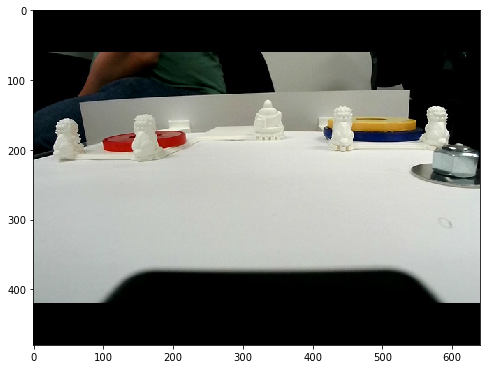

In [11]:
####------------DELETE THIS FOR THE FINAL IMPLEMENTATION----------------------------
# load the dictionary with the jpg dataset stored at DATA


def display(img, cmap='gray'):
    fig = plt.figure(figsize = (8,9))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')
    
    

hanoi_dict = {} #dictionary used to store the images
img_quant = 21  #number of samples pictures


for i in range (1, (img_quant+1)):

    
    #note: the files from 18 nov are the ones without the withe background
    #name_file = 'DATA/CamosunTest/hanoinov18sample (' + str(i) + ').jpg'
    name_file = 'DATA/CamosunTest/hanoinov24sample (' + str(i) + ').jpg'
    name_var = str('hanoi'+str(i))
    
    hanoi_dict[name_var] = cv2.imread(name_file)

#load the image that I want to know the HSV value, but first look in the RGB version and also get the HSV version

img = hanoi_dict['hanoi3']
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
imagehsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
imagecopy = image.copy()
imagehsvcopy = imagehsv.copy()
display(image)

small_image_hsv = imagehsvcopy[130:230, 0:630]



#####------DELETE ABOVE !!!!!----###############-

In [12]:
if droid.state == 'hanoi_game':
    print ("inside hanoi_game state")
    
    #--------- UNCOMMENT FOR FINAL APPLICATION
    #frame = vidpro.take_one_frame() #this is to take the picture of the outside. I should compare to the inital state
    #small_image_hsv = vidpro.convert_and_crop(frame)
    
    
    #pilas: cuando se trabaje con el definitivo, tengo que cambiar el nombre de imagecopy por el de frame
    for i in range (0, 3):
        image2 = cv2.rectangle(imagecopy, (glb.mask_x_position_dict['x'+str(i)], glb.mask_y_position_dict['y'+str(i)]+130), ((glb.mask_x_position_dict['x'+str(i)] + glb.mask_width), (glb.mask_y_position_dict['y'+str(i)]+glb.mask_height+130)), (0,0,255), thickness = 2)
  
    frame3 = cv2.cvtColor(image2, cv2.COLOR_BGR2HSV)
    
    #display(image2)
    
    for i in range(0, 3):
        imagehsv_roi = small_image_hsv[glb.mask_y_position_dict['y'+str(i)]:(glb.mask_y_position_dict['y'+str(i)] + glb.mask_height), int(glb.mask_x_position_dict['x'+str(i)]):int(glb.mask_x_position_dict['x'+str(i)]+glb.mask_width)]
        #display(imagehsv_roi)
        sort_disc_dictionary['sort' + str(i)] = vidpro.detect_color(imagehsv_roi) 
    
    state = 0
    frame2 = mtx_state_dict['state' + str(state)]
    hanoi_mat= glb.hanoi_matrix_char[(3*state):(3*(state+1)), :] #this is the theorical correct matrix
    detected_matrix_char = mtrx.get_detected_matrix_char(sort_disc_dictionary) #this is the matrix detected by the camera
    image_with_letters = write_in_image(image2,detected_matrix_char) #write the letters of the detected matrix
    frame1 = cv2.cvtColor(image_with_letters.copy(), cv2.COLOR_BGR2RGB) 
    flip_detected_matrix_char = np.fliplr(detected_matrix_char) #need to flip to adjust user/robot perspective
    matrices_are_equal = (flip_detected_matrix_char == hanoi_mat).all()
    
    #display(image_with_letters)
    
    if matrices_are_equal: #if the matrices are equal, continues next state, if not, go to prompt error
        frame4 = cv2.imread('DATA/states_img/match.png')
        droid.hg_start()
    else:
        
        frame4 = cv2.imread('DATA/states_img/nomatch.png')    
        droid.dif_mtx()
        
    draw_matrix(frame1,frame2,frame3,frame4)
    
    time.sleep(10)
            
            
            
            
    

inside hanoi_game state


In [13]:
droid.state

'prompt_error'

In [20]:
flip_detected_matrix_char

array([['R', '0', '0'],
       ['Y', '0', '0'],
       ['B', '0', '0']], dtype='<U1')

In [21]:
 hanoi_mat

array([['R', '0', '0'],
       ['Y', '0', '0'],
       ['B', '0', '0']], dtype='<U1')

In [22]:
matrices_are_equal

True

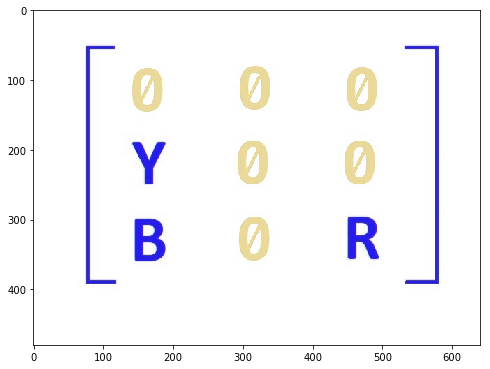

In [28]:
display(mtx_state_dict['state1'])

In [24]:
frame = mtx_state_dict['state1']

In [25]:
 cv2.imshow('MainFrame', frame)

error: OpenCV(3.4.2) C:\Miniconda3\conda-bld\opencv-suite_1534379934306\work\modules\highgui\src\window.cpp:356: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


In [21]:
len(mtx_state_dict)

8

In [26]:
frame